### Problem Statement

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.


Dataset Description

employee_id	Unique ID for employee
department	Department of employee
region	Region of employment (unordered)
education	Education Level
gender	Gender of Employee
recruitment_channel	Channel of recruitment for employee
no_of_trainings	no of other trainings completed in previous year on soft skills, technical skills etc.
age	Age of Employee
previous_year_rating	Employee Rating for the previous year
length_of_service	Length of service in years
KPIs_met >80%	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
awards_won?	if awards won during previous year then 1 else 0
avg_training_score	Average score in current training evaluations
is_promoted	(Target) Recommended for promotion


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from statsmodels.imputation.mice import MICE,MICEData

In [3]:
train = pd.read_csv("test_2umaH9m.csv")

In [4]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [5]:
imputer = MICEData(train.select_dtypes(include=np.number).drop(columns=["awards_won?","KPIs_met >80%"]))

In [6]:
imputer.set_imputer(endog_name="education")

In [7]:
imputer.update_all()

/anaconda3/lib/python3.6/site-packages/statsmodels/imputation/mice.py:1081: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ix = dxi[[jj, ir]]
/anaconda3/lib/python3.6/site-packages/statsmodels/imputation/mice.py:1082: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  iz = ixm[[jj, ix]]
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [8]:
imputer.data.isna().sum()

employee_id             0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
avg_training_score      0
dtype: int64

In [9]:
imputer.data.shape

(23490, 6)

In [10]:
train.shape

(23490, 13)

In [11]:
train_copy = train.copy(deep=True)

In [12]:
train= pd.concat([imputer.data,train.select_dtypes(exclude=np.number)],axis=1)

In [13]:
train_copy.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [14]:
train.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'avg_training_score', 'department', 'region',
       'education', 'gender', 'recruitment_channel'],
      dtype='object')

#### we dropped KPIs and awards so adding them back

In [15]:
train= pd.concat([train,train_copy[['KPIs_met >80%', 'awards_won?']]],axis=1)

In [16]:
train.shape

(23490, 13)

In [17]:
train.isna().sum()

employee_id                0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
avg_training_score         0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
KPIs_met >80%              0
awards_won?                0
dtype: int64

### education-categorical variable still has nulls

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
cimp= SimpleImputer(strategy="most_frequent")

In [20]:
train["education"]=cimp.fit_transform(np.array(train["education"]).reshape(-1,1))

In [21]:
train.isna().sum()

employee_id             0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
avg_training_score      0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
KPIs_met >80%           0
awards_won?             0
dtype: int64

In [22]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train,y_train)

In [23]:
# imputer.perturb_params()
# imputer.impute_pmm(vname="education")

In [24]:
train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,department,region,education,gender,recruitment_channel,KPIs_met >80%,awards_won?
0,8724,1,24,5.0,1,77,Technology,region_26,Bachelor's,m,sourcing,1,0
1,74430,1,31,3.0,5,51,HR,region_4,Bachelor's,f,other,0,0
2,72255,1,31,1.0,4,47,Sales & Marketing,region_13,Bachelor's,m,other,0,0
3,38562,3,31,2.0,9,65,Procurement,region_2,Bachelor's,f,other,0,0
4,64486,1,30,4.0,7,61,Finance,region_29,Bachelor's,m,sourcing,0,0


In [25]:
train.shape

(23490, 13)

In [26]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,KPIs_met >80%,awards_won?
count,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.333376,5.810387,63.263133,0.358834,0.022776
std,22640.809201,0.600910,7.679492,1.265684,4.207917,13.411750,0.479668,0.149191
min,3.000000,1.000000,20.000000,1.000000,1.000000,39.000000,0.000000,0.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,51.000000,0.000000,0.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,60.000000,0.000000,0.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,76.000000,1.000000,0.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,99.000000,1.000000,1.000000


In [27]:
train = train.dropna()

In [28]:
train.isna().sum()

employee_id             0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
avg_training_score      0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
KPIs_met >80%           0
awards_won?             0
dtype: int64

In [29]:
# target = train.is_promoted

In [30]:
train.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'avg_training_score', 'department', 'region',
       'education', 'gender', 'recruitment_channel', 'KPIs_met >80%',
       'awards_won?'],
      dtype='object')

In [31]:
# train_treated
# numerical = train.select_dtypes(include = np.number)
# nonnumerical = train.select_dtypes(exclude = np.number)

In [32]:
# numerical.head()

#### Feature Exploration

In [33]:
# train.is_promoted.value_counts().sort_index()

In [34]:
# # plt.figure(figsize=(12,12))
# sns.boxplot(train.is_promoted)

In [35]:
train.no_of_trainings.value_counts().sort_index()

1    18928
2     3544
3      755
4      190
5       36
6       24
7        9
8        2
9        2
Name: no_of_trainings, dtype: int64

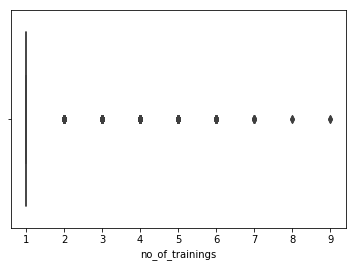

In [36]:
sns.boxplot(train.no_of_trainings)

In [37]:
train.age.value_counts().sort_index() 

20      51
21      39
22      98
23     214
24     336
25     586
26     857
27    1234
28    1362
29    1456
30    1595
31    1526
32    1481
33    1387
34    1321
35    1169
36    1022
37     899
38     862
39     751
40     675
41     585
42     475
43     435
44     356
45     303
46     277
47     256
48     220
49     209
50     205
51     161
52     167
53     154
54     139
55     135
56     121
57      95
58     104
59      83
60      89
Name: age, dtype: int64

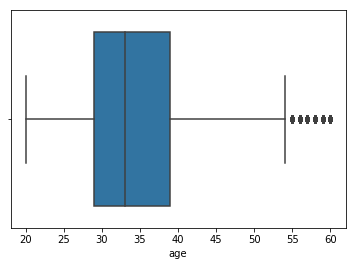

In [38]:
sns.boxplot(train.age)

In [39]:
# numerical.columns

In [40]:
train.previous_year_rating.value_counts().sort_index()

1.0    2936
2.0    1886
3.0    8589
4.0    4569
5.0    5510
Name: previous_year_rating, dtype: int64

In [41]:
train.length_of_service.value_counts().sort_index()

1     1992
2     2870
3     3033
4     2911
5     2592
6     2038
7     2344
8     1263
9     1070
10     941
11     352
12     328
13     271
14     261
15     240
16     212
17     204
18     166
19     142
20      62
21      29
22      27
23      31
24      18
25      24
26      14
27      16
28      12
29      10
30       6
31       7
32       1
33       1
34       2
Name: length_of_service, dtype: int64

In [42]:
train["KPIs_met >80%"].value_counts().sort_index()

0    15061
1     8429
Name: KPIs_met >80%, dtype: int64

In [43]:
train["awards_won?"].value_counts().sort_index()

0    22955
1      535
Name: awards_won?, dtype: int64

In [44]:
train["avg_training_score"].value_counts().sort_index()

39       1
40       3
41      11
42      16
43      68
44     161
45     317
46     506
47     787
48    1084
49    1144
50    1227
51    1023
52     791
53     551
54     424
55     391
56     394
57     633
58     789
59     877
60     889
61     768
62     632
63     427
64     340
65     239
66     226
67     313
68     356
      ... 
70     487
71     398
72     298
73     239
74     170
75     170
76     225
77     303
78     398
79     466
80     563
81     567
82     527
83     551
84     547
85     433
86     395
87     293
88     173
89     132
90      82
91      45
92      36
93      26
94      31
95      23
96      27
97      22
98      14
99      13
Name: avg_training_score, Length: 61, dtype: int64

In [45]:
# numerical.columns

'employee_id'- drop
'no_of_trainings'-bin
'age'-bin
'previous_year_rating'- contains null (drop null)
'length_of_service'- possible binning
'KPIs_met >80%'
'awards_won?'
'avg_training_score'
'is_promoted'- imbalanced - resampling

### Working on Numerical Features

In [46]:
# numerical.isna().sum()

In [47]:
# numerical_treated = numerical.copy(deep=True)

In [48]:
# numerical_treated = numerical.dropna()

In [49]:
# numerical_treated.isna().sum()

In [50]:
# numerical_treated = numerical_treated.drop(columns=["employee_id"])
# train_treated = train.drop(columns=["employee_id"])
train_treated = train.copy(deep=True)

In [51]:
def age(df):
    df.loc[df['age'] <= 28, 'age'] = 1
    df.loc[(df['age'] > 28) & (df['age'] <= 36), 'age'] = 2
    df.loc[(df['age'] > 36) & (df['age'] <= 44), 'age'] = 3
    df.loc[(df['age'] > 44) & (df['age'] <= 52), 'age'] = 4
    df.loc[(df['age'] > 52) & (df['age'] <= 60), 'age'] = 5    
        
    return df

In [52]:
age(train_treated)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,department,region,education,gender,recruitment_channel,KPIs_met >80%,awards_won?
0,8724,1,1,5.0,1,77,Technology,region_26,Bachelor's,m,sourcing,1,0
1,74430,1,2,3.0,5,51,HR,region_4,Bachelor's,f,other,0,0
2,72255,1,2,1.0,4,47,Sales & Marketing,region_13,Bachelor's,m,other,0,0
3,38562,3,2,2.0,9,65,Procurement,region_2,Bachelor's,f,other,0,0
4,64486,1,2,4.0,7,61,Finance,region_29,Bachelor's,m,sourcing,0,0
5,46232,1,2,3.0,2,68,Procurement,region_7,Bachelor's,m,sourcing,0,0
6,54542,1,2,5.0,3,57,Finance,region_2,Bachelor's,m,other,1,0
7,67269,2,2,3.0,3,85,Analytics,region_22,Bachelor's,m,sourcing,0,0
8,66174,1,4,4.0,11,75,Technology,region_7,Master's & above,m,other,0,0
9,76303,1,2,5.0,2,76,Technology,region_22,Bachelor's,m,sourcing,1,0


In [53]:
def no_of_trainings(df):
    df.loc[df['no_of_trainings'] <= 1, 'no_of_trainings'] = 1
    df.loc[(df['no_of_trainings'] > 1) & (df['no_of_trainings'] <= 5), 'no_of_trainings'] = 2
    df.loc[(df['no_of_trainings'] > 5) & (df['no_of_trainings'] <= 10), 'no_of_trainings'] = 3
    
    return df

In [54]:
no_of_trainings(train_treated)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,department,region,education,gender,recruitment_channel,KPIs_met >80%,awards_won?
0,8724,1,1,5.0,1,77,Technology,region_26,Bachelor's,m,sourcing,1,0
1,74430,1,2,3.0,5,51,HR,region_4,Bachelor's,f,other,0,0
2,72255,1,2,1.0,4,47,Sales & Marketing,region_13,Bachelor's,m,other,0,0
3,38562,2,2,2.0,9,65,Procurement,region_2,Bachelor's,f,other,0,0
4,64486,1,2,4.0,7,61,Finance,region_29,Bachelor's,m,sourcing,0,0
5,46232,1,2,3.0,2,68,Procurement,region_7,Bachelor's,m,sourcing,0,0
6,54542,1,2,5.0,3,57,Finance,region_2,Bachelor's,m,other,1,0
7,67269,2,2,3.0,3,85,Analytics,region_22,Bachelor's,m,sourcing,0,0
8,66174,1,4,4.0,11,75,Technology,region_7,Master's & above,m,other,0,0
9,76303,1,2,5.0,2,76,Technology,region_22,Bachelor's,m,sourcing,1,0


#### Store Target

In [55]:
# target = train.is_promoted

###  Nonnumerical Analyses

In [56]:
# nonnumerical.columns

In [57]:
# nonnumerical.isna().sum()

In [58]:
# nonnumerical_treated = nonnumerical.dropna()

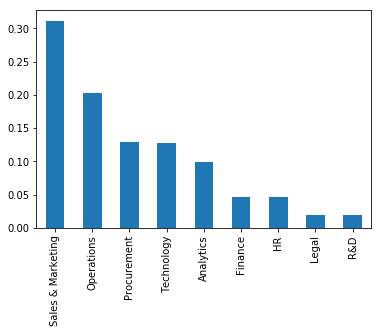

In [59]:
train_treated["department"].value_counts(normalize=True).plot.bar()
plt.show()

In [60]:
train_treated["department"].value_counts()

Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: department, dtype: int64

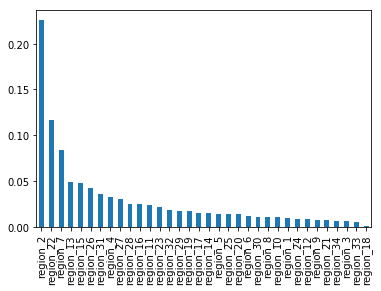

In [61]:
train_treated["region"].value_counts(normalize=True).plot.bar()
plt.show()

In [62]:
train_treated["region"].value_counts().sort_index()

region_1      238
region_10     269
region_11     571
region_12     215
region_13    1167
region_14     350
region_15    1130
region_16     590
region_17     361
region_18      20
region_19     410
region_2     5299
region_20     326
region_21     179
region_22    2739
region_23     516
region_24     219
region_25     337
region_26    1011
region_27     710
region_28     595
region_29     414
region_3      147
region_30     273
region_31     844
region_32     433
region_33     126
region_34     155
region_4      775
region_5      342
region_6      298
region_7     1982
region_8      269
region_9      180
Name: region, dtype: int64

In [63]:
train_treated["education"].value_counts()

Bachelor's          16612
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

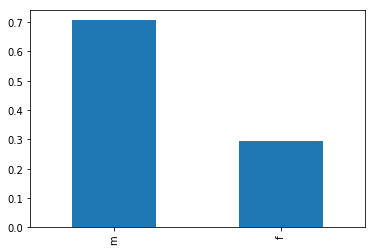

In [64]:
train_treated["gender"].value_counts(normalize=True).plot.bar()
plt.show()

In [65]:
train_treated["gender"].value_counts()

m    16596
f     6894
Name: gender, dtype: int64

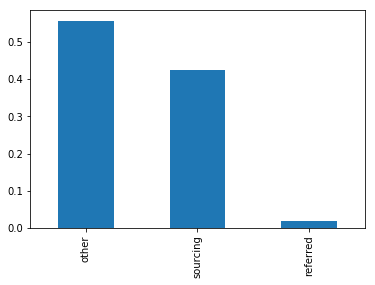

In [66]:
train_treated["recruitment_channel"].value_counts(normalize=True).plot.bar()
plt.show()

In [67]:
train_treated["recruitment_channel"].value_counts()

other       13078
sourcing     9961
referred      451
Name: recruitment_channel, dtype: int64

### Scaling Numericals

In [68]:
# train_treated
numerical_treated = train_treated.select_dtypes(include = np.number)

In [69]:
cols = numerical_treated.drop(columns=["employee_id","age","no_of_trainings"]).columns

In [70]:
# cols = numerical_treated.columns 

In [71]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(with_scaling="True")
## df_r stores the robust scaled data

df_r = scaler.fit_transform(numerical_treated.drop(columns=["employee_id","age","no_of_trainings"]))

df_r = pd.DataFrame(df_r, columns=cols)

df_r.head()

,previous_year_rating,length_of_service,avg_training_score,KPIs_met >80%,awards_won?
0,2.0,-1.00,0.68,1.0,0.0
1,0.0,0.00,-0.36,0.0,0.0
2,-2.0,-0.25,-0.52,0.0,0.0
3,-1.0,1.00,0.20,0.0,0.0
4,1.0,0.50,0.04,0.0,0.0


In [72]:
df_r= pd.concat([df_r,train_treated[["employee_id","age","no_of_trainings"]]],axis=1)

In [73]:
# binned_num = numerical_treated[["age","no_of_trainings"]]

In [74]:
# df_r = pd.concat([df_r,binned_num],axis=1)

### Encoding Nonnumericals

In [75]:
nonnumerical_treated = train_treated.select_dtypes(exclude = np.number)

In [76]:
nonnumerical_treated

,department,region,education,gender,recruitment_channel
0,Technology,region_26,Bachelor's,m,sourcing
1,HR,region_4,Bachelor's,f,other
2,Sales & Marketing,region_13,Bachelor's,m,other
3,Procurement,region_2,Bachelor's,f,other
4,Finance,region_29,Bachelor's,m,sourcing
5,Procurement,region_7,Bachelor's,m,sourcing
6,Finance,region_2,Bachelor's,m,other
7,Analytics,region_22,Bachelor's,m,sourcing
8,Technology,region_7,Master's & above,m,other
9,Technology,region_22,Bachelor's,m,sourcing


In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# nonnumerical_treated_1 = nonnumerical_treated.copy(deep=True)

## LabelEncoding 

for x in list(nonnumerical_treated.iloc[:,:]):
    nonnumerical_treated[x] = le.fit_transform(nonnumerical_treated[x])

## Encoded categoricals
    
nonnumerical_treated

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,department,region,education,gender,recruitment_channel
0,8,18,0,1,2
1,2,28,0,0,0
2,7,4,0,1,0
3,5,11,0,0,0
4,1,21,0,1,2
5,5,31,0,1,2
6,1,11,0,1,0
7,0,14,0,1,2
8,8,31,2,1,0
9,8,14,0,1,2


#### Concat

In [78]:
# stop

In [79]:
df_treated = pd.concat([df_r, nonnumerical_treated], axis=1)

In [80]:
# df_treated

In [81]:
df_treated.shape

(23490, 13)

In [82]:
df_treated_dropped_na = df_treated.dropna()

In [83]:
# df_treated_dropped_na

In [84]:
df_treated.isna().sum()

previous_year_rating    0
length_of_service       0
avg_training_score      0
KPIs_met >80%           0
awards_won?             0
employee_id             0
age                     0
no_of_trainings         0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
dtype: int64

In [85]:
sub= pd.DataFrame()
sub["employee-id"]=df_treated_dropped_na.employee_id

In [86]:
df_treated_dropped_na.isna().sum()

previous_year_rating    0
length_of_service       0
avg_training_score      0
KPIs_met >80%           0
awards_won?             0
employee_id             0
age                     0
no_of_trainings         0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
dtype: int64

In [87]:
df_treated_dropped_na.shape

(23490, 13)

In [88]:
----stop

NameError: name 'stop' is not defined

In [ ]:
# df_treated.shape

In [ ]:
# target.dropna().shape

#### Majority Minority Split

In [ ]:
df_minority = df_final[df_final["is_promoted"]==1]
df_majority = df_final[df_final["is_promoted"]==0]

In [ ]:
df_majority.shape,df_minority.shape

#### Resampling

In [ ]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True,n_samples= int(4232*2), random_state=123) 

## new minority shape

df_minority_upsampled.shape

In [ ]:
## concatenating new minority and majority

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
df_upsampled=df_upsampled.dropna()

In [ ]:
# target

In [110]:
from catboost import CatBoostClassifier

In [ ]:
cb = CatBoostClassifier()

In [89]:
import pickle

In [90]:
filename= "final.pkl"
loaded_model = pickle.load(open(filename, 'rb'))

In [91]:
result = loaded_model.predict(df_treated_dropped_na.drop(columns=["employee_id"]))

In [100]:
sub = pd.DataFrame()

In [103]:
sub["employee_id"]=df_treated_dropped_na.employee_id

In [104]:
sub["is_promoted"]= result

In [107]:
sub.is_promoted=sub.is_promoted.astype(int)

In [108]:
sub.is_promoted.value_counts()

0    23374
1      116
Name: is_promoted, dtype: int64

In [109]:
sub.to_csv("submission1.csv",index=False)

In [98]:
sub.isna().sum()

employee_id    0
is_promoted    0
dtype: int64

In [99]:
sub

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0
5,46232,0.0
6,54542,0.0
7,67269,0.0
8,66174,0.0
9,76303,0.0


In [ ]:
sub.to_csv("submission.csv",index=False)

In [ ]:
sub.iloc[0,0]

In [ ]:
sub = sub.set_index("employee-id")

In [ ]:
sub

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(df.drop("is_promoted", axis = 1), df_upsampled.is_promoted, test_size = 0.2, random_state = 42)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## LogReg

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log= LogisticRegression(class_weight="balanced",random_state=42)

In [ ]:
log.fit(X_train,y_train)
ypred_log=log.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, ypred_log))
print(accuracy_score(y_test, ypred_log))

In [ ]:
## f1 being the harmonic mean of PR is the preferred metric 

from sklearn.metrics import f1_score

f1_score(y_test,ypred_log)

## DTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight="balanced")
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_score(y_test, y_pred_dtc)

In [ ]:
dtc_cv = (cross_val_score(dtc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean())

dtc_cv

In [ ]:
f1_score(y_test,y_pred_dtc)

In [ ]:
print(classification_report(y_test, y_pred_dtc))
print(accuracy_score(y_test, y_pred_dtc))


In [ ]:
coef = pd.Series(dtc.feature_importances_,df_upsampled.drop('is_promoted', axis = 1).columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances')

## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)

In [ ]:

## cross validating(k/10 folds) with rfc and obtaining the mean subsequently

cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy')

rfc_cv = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean())

rfc_cv

In [ ]:
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

f1_score(y_test,y_pred_rf)

In [ ]:
coef = pd.Series(rfc.feature_importances_,df_upsampled.drop('is_promoted', axis = 1).columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances')

In [ ]:
# #
# X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_upsampled.drop(columns=["is_promoted","awards_won?"], axis = 1), df_upsampled.is_promoted, test_size = 0.2, random_state = 42)
# k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
# rfc_new = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)
# rfc_new.fit(X_train_new, y_train_new)
# y_pred_rf_new = rfc_new.predict(X_test_new)

# cross_val_score(rfc_new, X_train_new, y_train_new, cv=k_fold, n_jobs=2, scoring = 'accuracy')

In [ ]:
# f1_score(y_test_new,y_pred_rf_new)

In [ ]:
import pickle

filename= "final_model_ab_unscaled.pkl"
pickle.dump(ab, open(filename, 'wb'))